# Pycaret Regression

## Load Dataset

In [16]:
from pycaret.regression import *

import pandas as pd
import numpy as np
import seaborn as sns


In [17]:
import pycaret
from platform import python_version
print(f'Pycaret version: {pycaret.__version__}\nPython version: {python_version()}')


Pycaret version: 3.0.0
Python version: 3.9.16


In [18]:
# load sample dataset
from pycaret.datasets import get_data
data = pd.read_csv('./Data/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
data_unseen = data.sample(frac=0.1)
data= data.drop(data_unseen.index)
print(f'Data for model: {data.shape}, \nData for unseen predicitions: {data_unseen.shape}')
data_unseen.to_csv('./Data/unseenData_MallCustomers.csv', index=False)

Data for model: (180, 5), 
Data for unseen predicitions: (20, 5)


## Setup

In [20]:
from pycaret.regression import *
s = setup(data, target = 'Age', ignore_features='CustomerID')

,Description,Value
0,Session id,3749
1,Target,Age
2,Target type,Regression
3,Original data shape,"(180, 5)"
4,Transformed data shape,"(180, 4)"
5,Transformed train set shape,"(125, 4)"
6,Transformed test set shape,"(55, 4)"
7,Ignore features,10
8,Ordinal features,1
9,Numeric features,2


In [21]:
s.dataset_transformed

,Gender,Annual Income (k$),Spending Score (1-100),Age
44,0.0,39.0,28.0,49
24,0.0,28.0,14.0,54
102,1.0,62.0,59.0,67
29,0.0,29.0,87.0,23
50,0.0,42.0,52.0,49
...,...,...,...,...
147,0.0,77.0,74.0,32
108,1.0,63.0,43.0,68
145,1.0,77.0,97.0,28
114,0.0,65.0,48.0,18


#### Early EDA optional

In [22]:
#eda();

## Compare Models

In [23]:
#models()

In [24]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,10.7212,181.2057,13.3389,0.0022,0.3366,0.3160,0.4630
lasso,Lasso Regression,10.7526,182.1586,13.3738,-0.0024,0.3384,0.3184,0.6910
llar,Lasso Least Angle Regression,10.7526,182.1586,13.3738,-0.0024,0.3384,0.3184,0.4300
br,Bayesian Ridge,10.8435,182.5441,13.3985,-0.0058,0.3395,0.3207,0.4530
en,Elastic Net,10.7704,183.1049,13.4064,-0.0073,0.3393,0.3194,0.4570
ridge,Ridge Regression,10.8871,187.9940,13.5677,-0.0327,0.3437,0.3253,0.4410
lr,Linear Regression,10.8936,188.2772,13.5771,-0.0342,0.3440,0.3256,0.8100
lar,Least Angle Regression,10.8936,188.2772,13.5771,-0.0342,0.3440,0.3256,0.4450
huber,Huber Regressor,10.8157,188.2191,13.5766,-0.0363,0.3414,0.3201,0.4740
knn,K Neighbors Regressor,10.5983,192.1960,13.6020,-0.0772,0.3406,0.3205,0.4600


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize='deprecated', precompute='auto', tol=None)

#### Create model choosen from above:

In [25]:
model = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.9692,171.4132,13.0925,0.2090,0.2852,0.2248
1,14.1726,305.4898,17.4783,-0.3399,0.4671,0.5135
2,11.5090,207.7574,14.4138,-0.4941,0.3345,0.2662
3,12.6408,302.2592,17.3856,-0.6713,0.4949,0.5268
4,6.7155,100.5476,10.0273,0.1428,0.2226,0.1545
5,10.3092,138.8500,11.7835,0.1622,0.2986,0.2931
6,13.4429,269.9185,16.4292,-0.2511,0.4100,0.3801
7,9.9154,199.5130,14.1249,0.0939,0.3543,0.2960
8,9.3356,174.1701,13.1974,-0.2931,0.3697,0.3380


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Evaluate Model

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

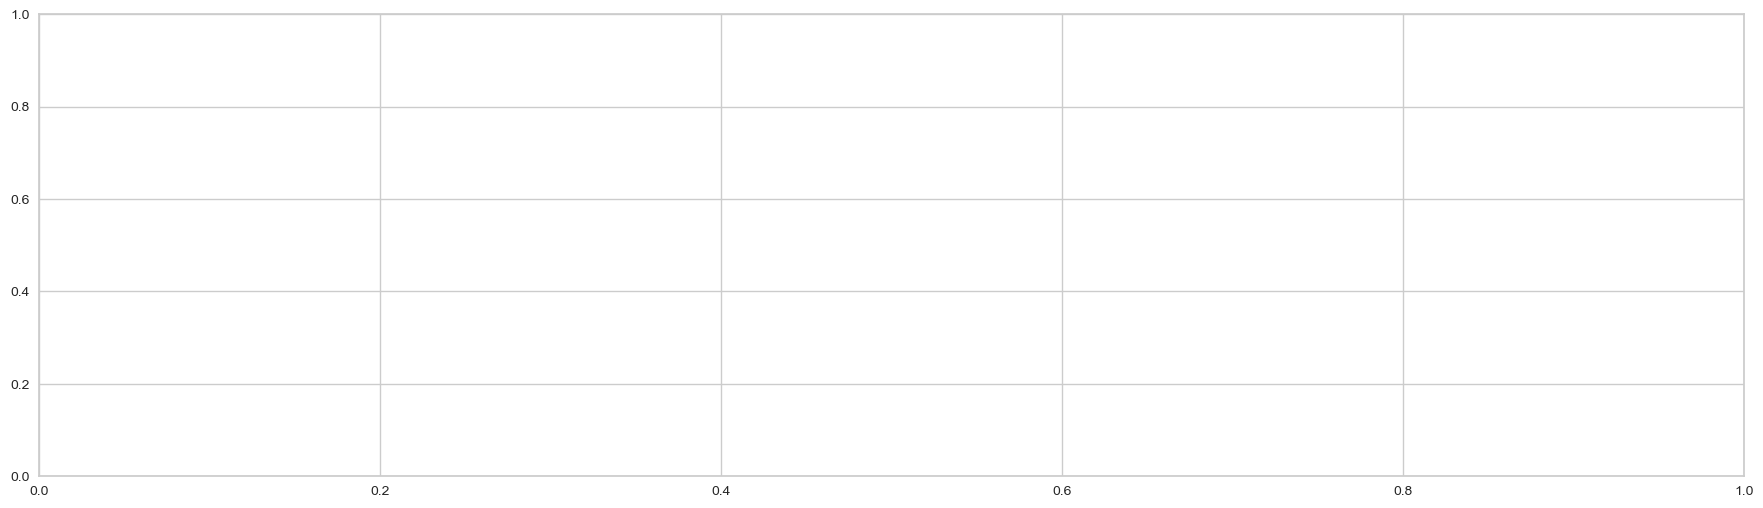

In [26]:
evaluate_model(model)

#### Print out graphs of value from the evaluation:

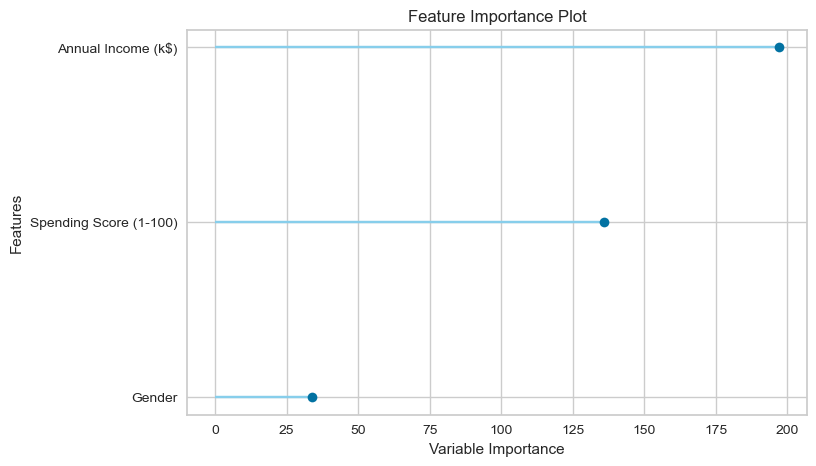

In [27]:
plot_model(model,plot='feature')

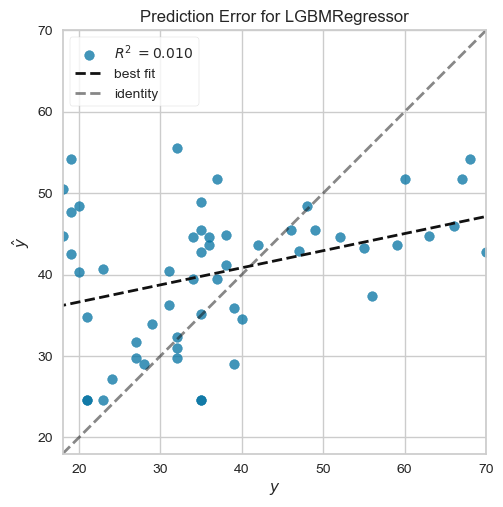

In [33]:
plot_model(model,plot='error')

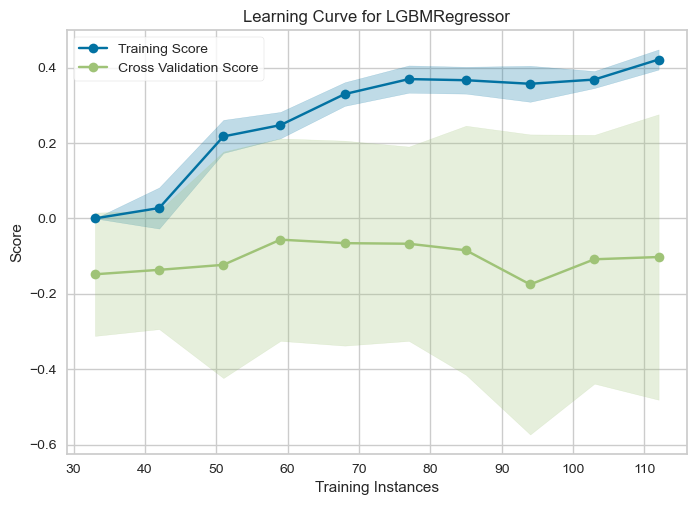

In [34]:
plot_model(model, plot='learning')

In [115]:
#plot_model(model, plot='residuals_interactive')

## Predict Model Choosen

In [35]:
predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,10.7523,198.7480,14.0978,0.0100,0.3870,0.3720


,Gender,Annual Income (k$),Spending Score (1-100),Age,prediction_label
190,Female,103,23,34,44.670872
86,Female,57,58,55,43.214989
160,Female,79,35,56,37.377221
16,Female,21,35,35,42.756739
112,Female,64,42,38,41.175017
22,Female,25,5,46,45.488588
35,Female,33,81,21,24.570190
183,Female,98,88,29,33.962652
93,Female,60,40,40,34.590965
6,Female,18,6,35,45.488588


## Tuned Model (if needed)

In [47]:
tuned_model = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.6733,172.5561,13.1361,0.2037,0.2836,0.2165
1,13.4125,289.3957,17.0116,-0.2693,0.4576,0.4894
2,10.5771,182.7458,13.5184,-0.3142,0.3150,0.2436
3,12.0300,288.0159,16.9710,-0.5925,0.4835,0.5031
4,8.2008,129.0032,11.3580,-0.0998,0.2542,0.1979
5,10.0899,129.5738,11.3831,0.2181,0.2878,0.2854
6,13.0080,256.0172,16.0005,-0.1867,0.4037,0.3626
7,9.8654,195.7197,13.9900,0.1111,0.3521,0.2975
8,9.0675,163.2465,12.7768,-0.2120,0.3602,0.3296


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [46]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,10.6043,193.7868,13.9207,0.0347,0.3829,0.3620


,Gender,Annual Income (k$),Spending Score (1-100),Age,prediction_label
190,Female,103,23,34,43.322166
86,Female,57,58,55,42.996871
160,Female,79,35,56,38.256911
16,Female,21,35,35,45.288515
112,Female,64,42,38,42.974793
22,Female,25,5,46,46.857162
35,Female,33,81,21,23.339996
183,Female,98,88,29,34.643022
93,Female,60,40,40,36.438199
6,Female,18,6,35,46.857162


In [38]:
final_model = finalize_model(tuned_model)
final_model

Pipeline(memory=FastMemory(location=C:\Users\barbi\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Annual Income (k$)',
                                             'Spending Score (1-100)'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('c...
                               colsample_bytree=1.0, feature_fraction=0.5,
                               importance_type='split', learning_rate=0.2,
                               max_depth=-1, min_child_samples=16,
                               min_child_weight=0.001, min_split_gain=0.9,
                               n_estimators=30, n_jobs=-1, num_leaves=20,
                               objective=None, random_state=3749, reg_alpha=0.1,
                               reg_lambda=0.001, silent='warn', subsample=1.0,
                               subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

## Predict Model From Finalized

In [39]:
predict_model(final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,8.8986,129.1339,11.3637,0.3568,0.3214,0.2955


,Gender,Annual Income (k$),Spending Score (1-100),Age,prediction_label
190,Female,103,23,34,44.915052
86,Female,57,58,55,47.024840
160,Female,79,35,56,40.033625
16,Female,21,35,35,38.590927
112,Female,64,42,38,36.786744
22,Female,25,5,46,43.051954
35,Female,33,81,21,23.316079
183,Female,98,88,29,33.988662
93,Female,60,40,40,33.955626
6,Female,18,6,35,43.051954


#### Optional: using predict model on all the data (Note: raw_score = True- gives the probablity of prediction 

In [40]:
#gbr_pred_all = predict_model(gbr, data=data, raw_score=True)
#gbr_pred_all

## Save Model

In [41]:
save_model(final_model, './Data/final_model_regressionPL_MallCustomers.csv')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\barbi\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Annual Income (k$)',
                                              'Spending Score (1-100)'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('c...
                                colsample_bytree=1.0, feature_fraction=0.5,
          

## Load Model

In [42]:
loaded_model = load_model('./Data/final_model_regressionPL_MallCustomers.csv')

Transformation Pipeline and Model Successfully Loaded


In [43]:
pred = predict_model(loaded_model, data=data_unseen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,8.0994,100.4038,10.0202,0.0323,0.2879,0.2780


In [44]:
pred

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100),Age,prediction_label
25,26,Male,28,82,29,27.211456
1,2,Male,15,81,21,27.211456
182,183,Male,98,15,46,49.310107
123,124,Male,69,91,39,38.055544
98,99,Male,61,42,48,36.409907
87,88,Female,57,55,22,45.002511
51,52,Male,42,60,33,43.441154
72,73,Female,50,49,60,49.862121
198,199,Male,137,18,32,47.849849
75,76,Male,54,54,26,43.507446
